# Medical Cost Personal with Regression

### Table of Contents
- 1. [Inspiration Statement](#section1)</br>
    - 1.1 [Introduction](#section101)<br/>
    - 1.2 [Data source and data set](#section102)<br/>
- 2. [Load the packages and data](#section2)</br>
- 3. [Data profiling](#section3)</br>
    - 3.1 [dtypes](#section301)<br/>
    - 3.2 [head](#section302)<br/>
    - 3.3 [describe](#section303)<br/>
    - 3.4 [sample](#section304)<br/>
    - 3.5 [Pandas profiling](#section305)<br/>
    - 3.6 [Initial observations](#section306)<br/>
    - 3.7 [Final observations](#section307)<br/>


To be continued...

<a id=section1></a> 
## 1. Inspiration Statement !

"Can i accurately predict insurance costs?"
<a id=section101></a> 
### 1.1. Introduction
This Exploratory Data Analysis and prediction of health insurance costs with linear regression determine the direction of the relationship between the independent variable and the dependent variable and to predict the value of the dependent variable if the value of the independent variable increases or decreases.

<a id=section102></a> 
### 1.2. Data source and dataset

__a__. How was it collected? 

- __sex:__ insurance contractor gender, female, male
- __bmi:__ Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
- __children:__ Number of children covered by health insurance / Number of dependents
- __smoker:__ Smoking
- __region:__ the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
- __charges:__ Individual medical costs billed by health insurance

__b__. Is it a sample? If yes, was it properly sampled?
- Yes, it is a sample. We don't have official information about the data collection method, but it appears *not* to be a random sample, so we can assume that it is not representative. 

<a id=section2></a> 
### 2. Load the packages and data 
#### Run this line in case you dont have pandas_profiling installed.
```python
!pip install pandas_profiling
```                                                  

In [70]:
import sys                                                                      # Import packages
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import pie, axis, show
%matplotlib inline                                                              

import warnings                                                                 # Ignore warning related to pandas_profiling
warnings.filterwarnings('ignore') 

pd.set_option('display.max_columns', 100)                                       # Display all dataframe columns in outputs (it has 6 columns, which is wider than the notebook)

insurance_data = pd.read_csv("data/insurance.csv")    

<a id=section3></a> 
### 3. Data Profiling

Review the data types and sample data to understand what variables we are dealing with?<br>
Which variables need to be transformed in some way before they can be analyzed?

In [43]:
insurance_data.shape

(1338, 7)

In [44]:
insurance_data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [45]:
insurance_data.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


In [46]:
insurance_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


#### Observations

As we can see there, min, max , std, and quartiles

In [47]:
import pandas_profiling                                                      # Get a quick overview for all the variables using pandas_profiling                                         
profile = pandas_profiling.ProfileReport(insurance_data)
profile.to_file(outputfile="pre_insurance_data.html")                              # HTML file will be downloaded to your workspace

<a id=section306></a> 
### 3.6. Initial observations:

- Summary of data types in this dataset:

   - children has 574 / 42.9% Zeros.
   - Dataset has 1 duplicate rows Warning.

#### Explore the numeric variable Age and others to confirm whether all values are within a reasonable range and if any are NaN.

In [48]:
print("'Age'")                                                                
print("Minimum value: ", insurance_data["age"].min())
print("Maximum value: ", insurance_data["age"].max())
print("How many values are NaN?: ", pd.isnull(insurance_data['age']).sum())

'Age'
Minimum value:  18
Maximum value:  64
How many values are NaN?:  0


In [49]:
print("'BMI'")                                                                
print("Minimum value: ", insurance_data["bmi"].min())
print("Maximum value: ", insurance_data["bmi"].max())
print("How many values are NaN?: ", pd.isnull(insurance_data['bmi']).sum())

'BMI'
Minimum value:  15.96
Maximum value:  53.13
How many values are NaN?:  0


In [50]:
print("'children'")                                                                
print("Minimum value: ", insurance_data["children"].min())
print("Maximum value: ", insurance_data["children"].max())
print("How many values are NaN?: ", pd.isnull(insurance_data['children']).sum())

insurance_data[insurance_data["children"] == 0].children.count()

'children'
Minimum value:  0
Maximum value:  5
How many values are NaN?:  0


574

In [51]:
print("'charges'")                                                                
print("Minimum value: ", insurance_data["charges"].min())
print("Maximum value: ", insurance_data["charges"].max())
print("How many values are NaN?: ", pd.isnull(insurance_data['charges']).sum())


'charges'
Minimum value:  1121.8739
Maximum value:  63770.42801
How many values are NaN?:  0


#### Count the number of distinct responses and list them.

In [52]:
print("Count of distinct responses for Gender:", len(set(insurance_data['sex'])))      # Learn more about the variable Gender, which appears not to be standardized with 49 distinct responses.
print("Distinct responses for Gender:", set(insurance_data['sex']))      

Count of distinct responses for Gender: 2
Distinct responses for Gender: {'female', 'male'}


In [53]:
print("Count of distinct responses for region:", len(set(insurance_data['region'])))      # Learn more about the variable Gender, which appears not to be standardized with 49 distinct responses.
print("Distinct responses for region:", set(insurance_data['region']))      

Count of distinct responses for region: 4
Distinct responses for region: {'northeast', 'southeast', 'northwest', 'southwest'}


#  Handling Categorical Features

Our Area feature is unordered, so we have to create **additional dummy variables**.

In [54]:
sex_status = pd.get_dummies(insurance_data.sex, prefix='sex')
sex_status.head()

,sex_female,sex_male
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1


However, we actually only need **one dummy variables, not two**. __Reason???__
Because one dummies captures all the "information" about the sex feature, and implicitly defines rural as the "baseline level".

Let's see what that looks like:

In [55]:
sex_status = pd.get_dummies(insurance_data.sex, prefix='sex').iloc[:, 1:]
sex_status.head()

,sex_male
0,0
1,1
2,1
3,1
4,1


Here is how we interpret the coding:
- **male** is coded as  sex_female = 0  and  sex_male = 1
- **female** is coded as  sex_female = 1  and  sex_male = 0

In [56]:
# concatenate the dummy variable columns onto the DataFrame (axis=0 means rows, axis=1 means columns)
insurance_data = pd.concat([insurance_data, sex_status], axis=1)
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges,sex_male
0,19,female,27.900,0,yes,southwest,16884.92400,0
1,18,male,33.770,1,no,southeast,1725.55230,1
2,28,male,33.000,3,no,southeast,4449.46200,1
3,33,male,22.705,0,no,northwest,21984.47061,1
4,32,male,28.880,0,no,northwest,3866.85520,1


In [57]:
smoker_status = pd.get_dummies(insurance_data.smoker, prefix='smoker')
smoker_status.head()

,smoker_no,smoker_yes
0,0,1
1,1,0
2,1,0
3,1,0
4,1,0


In [58]:
smoker_status = pd.get_dummies(insurance_data.smoker, prefix='smoker').iloc[:, 1:]
smoker_status.head()

,smoker_yes
0,1
1,0
2,0
3,0
4,0


Here is how we interpret the coding:
- **yes** is coded as  somker_yes = 1  and  somker_no = 0
- **no** is coded as  somker_yes = 0  and  somker_no = 1

In [59]:
# concatenate the dummy variable columns onto the DataFrame (axis=0 means rows, axis=1 means columns)
insurance_data = pd.concat([insurance_data, smoker_status], axis=1)
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges,sex_male,smoker_yes
0,19,female,27.900,0,yes,southwest,16884.92400,0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0


In [60]:
region_status = pd.get_dummies(insurance_data.region, prefix='region')
region_status.head()

,region_northeast,region_northwest,region_southeast,region_southwest
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0


In [61]:
region_status = pd.get_dummies(insurance_data.region, prefix='region').iloc[:, 1:]
region_status.head()

,region_northwest,region_southeast,region_southwest
0,0,0,1
1,0,1,0
2,0,1,0
3,1,0,0
4,1,0,0


Here is how we interpret the coding:
- **northeast** is coded as  region_northwest	 = 0  ,   region_southeast	 = 0 and  region_southwest = 0
- **northwest** is coded as  region_northwest    = 1  ,   region_southeast	 = 0 and  region_southwest = 0  
- **southeast** is coded as  region_northwest    = 0  ,   region_southeast	 = 1 and  region_southwest = 0  
- **southwest** is coded as  region_northwest    = 0  ,   region_southeast	 = 0 and  region_southwest = 1  

In [62]:
# concatenate the dummy variable columns onto the DataFrame (axis=0 means rows, axis=1 means columns)
insurance_data = pd.concat([insurance_data, region_status], axis=1)
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,female,27.900,0,yes,southwest,16884.92400,0,1,0,0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0,0,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0,0,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0,1,0,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0,1,0,0


__Distribution of Features__

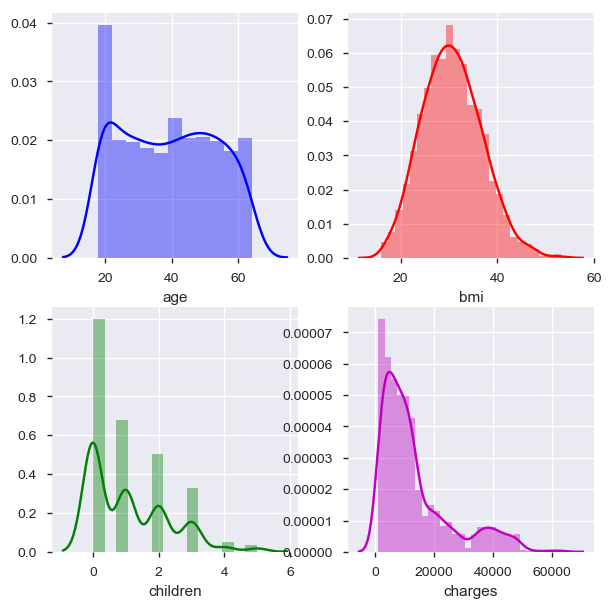

In [67]:
f, axes = plt.subplots(2, 2, figsize=(7, 7))                                     # Set up the matplotlib figure
sns.despine(left=True)

sns.distplot(insurance_data.age, color="b", ax=axes[0, 0])

sns.distplot(insurance_data.bmi, color="r", ax=axes[0, 1])

sns.distplot(insurance_data.children, color="g", ax=axes[1, 0])

sns.distplot(insurance_data.charges, color="m", ax=axes[1, 1])

__Observations__<br/>
_bmi_ seems to be __normal distribution__. 
Spending on _charges_ seems to be __right skewed__.
_age_ seems be __uniform distribution__. 

# Is there a relationship between age, children and bmi on charges?

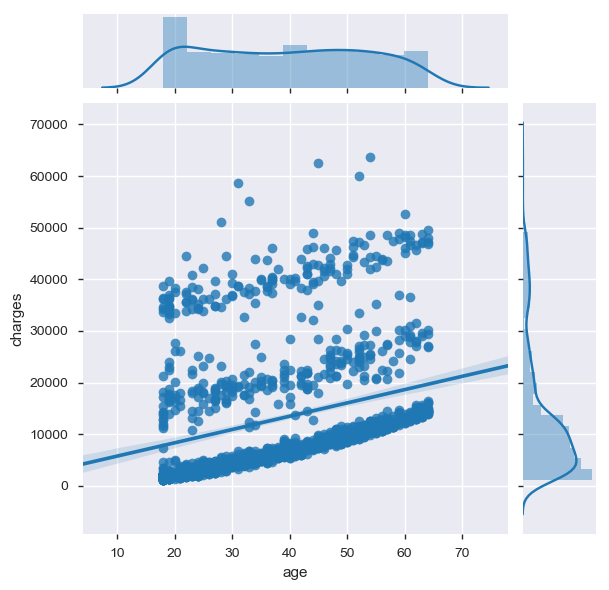

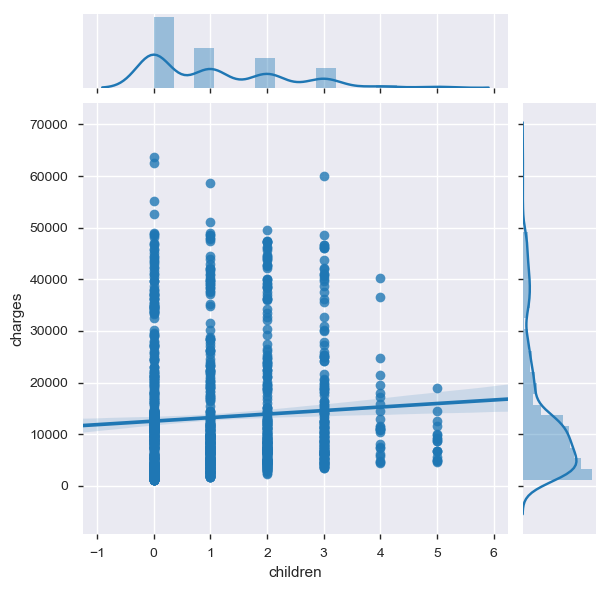

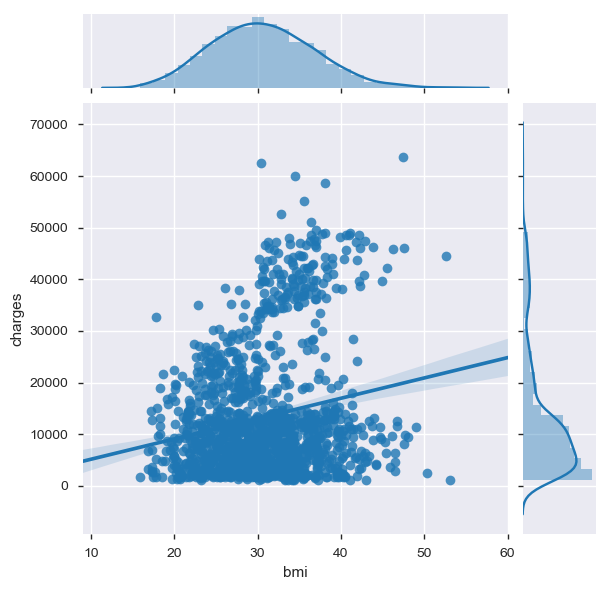

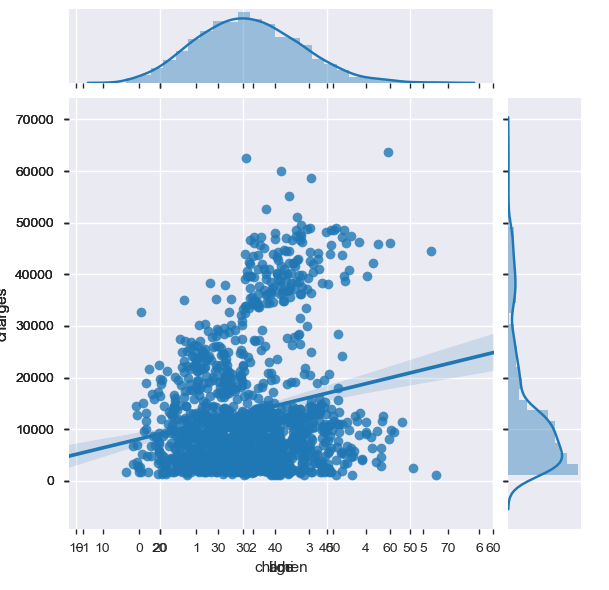

In [68]:
JG1 = sns.jointplot("age", "charges", data=insurance_data, kind='reg')
JG2 = sns.jointplot("children", "charges", data=insurance_data, kind='reg')
JG3 = sns.jointplot("bmi", "charges", data=insurance_data, kind='reg')

#subplots migration
f = plt.figure()
for J in [JG1, JG2,JG3]:
    for A in J.fig.axes:
        f._axstack.add(f._make_key(A), A)

### Visualising Pairwise correlation

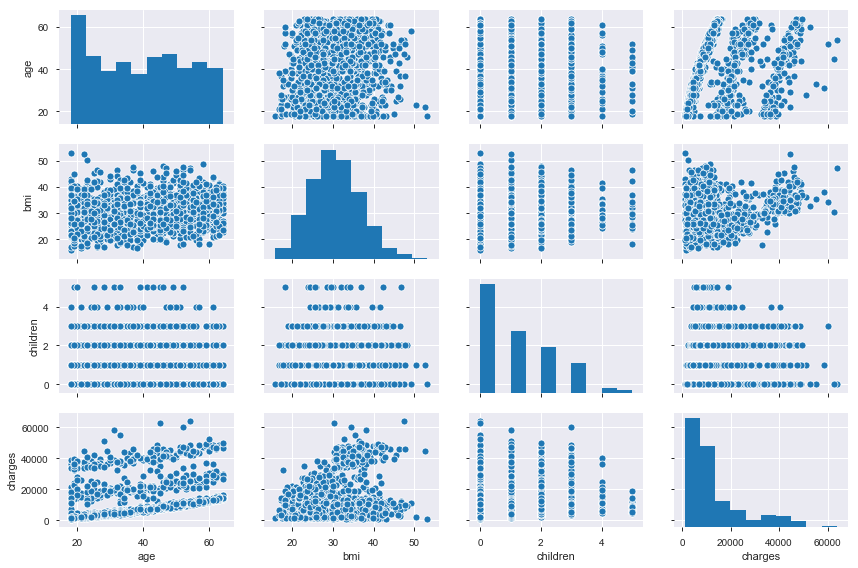

In [71]:
sns.pairplot(insurance_data, size = 2, aspect = 1.5)

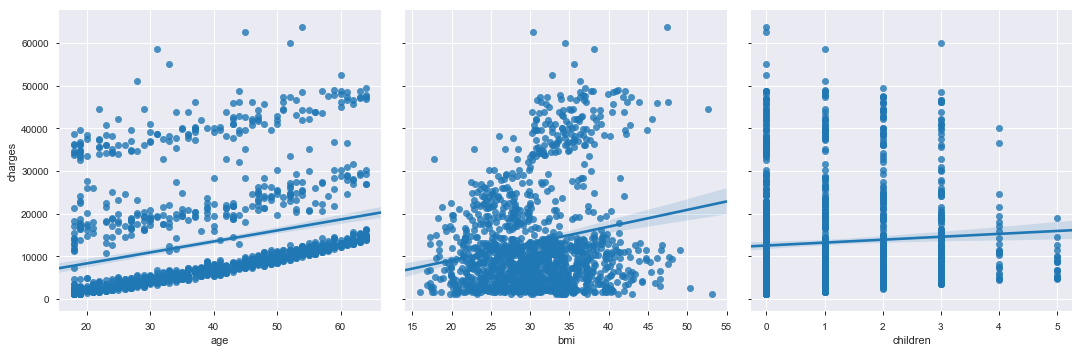

In [73]:
sns.pairplot(insurance_data, x_vars=['age', 'bmi', 'children'], y_vars='charges', size=5, aspect=1, kind='reg')

__Observation__

- Relationship between Age and charges
- Weak relationship between bmi and charges
- Very weak to no relationship between children and charges

# Calculating and plotting heatmap correlation

In [77]:
insurance_data.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


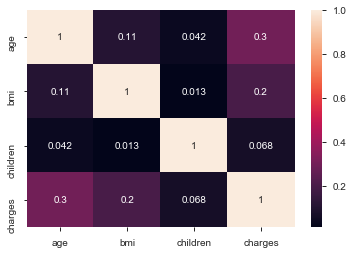

In [78]:
sns.heatmap( insurance_data.corr(), annot=True );

__Observation__

- The diagonal of the above matirx shows the auto-correlation of the variables. It is always 1. You can observe that the correlation between __age and charges is highest i.e. 0.3__ and then between __charges and bmi i.e. 0.3__.

- correlations can vary from -1 to +1. Closer to +1 means strong positive correlation and close -1 means strong negative correlation. Closer to 0 means not very strongly correlated. variables with __strong correlations__ are mostly probably candidates for __model builing__.


# Preparing X and y using pandas

- __Standardization__. <br/>
Standardize features by removing the _mean_ and scaling to _unit standard deviation_.

In [81]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [90]:
standard_insurance_data = insurance_data[['age','bmi','children', 'charges']]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(standard_insurance_data)
data1 = scaler.transform(standard_insurance_data)

In [93]:
data = pd.DataFrame(data1)
data.head()

,0,1,2,3
0,-1.438764,-0.453320,-0.908614,0.298584
1,-1.509965,0.509621,-0.078767,-0.953689
2,-0.797954,0.383307,1.580926,-0.728675
3,-0.441948,-1.305531,-0.908614,0.719843
4,-0.513149,-0.292556,-0.908614,-0.776802


In [94]:
data.columns = ['age','bmi','children', 'charges']
data.head()

,age,bmi,children,charges
0,-1.438764,-0.453320,-0.908614,0.298584
1,-1.509965,0.509621,-0.078767,-0.953689
2,-0.797954,0.383307,1.580926,-0.728675
3,-0.441948,-1.305531,-0.908614,0.719843
4,-0.513149,-0.292556,-0.908614,-0.776802


In [96]:
feature_cols = ['age','bmi','children']                # create a Python list of feature names
X = data[feature_cols]                                     # use the list to select a subset of the original DataFrame-+
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(1338, 3)


In [100]:
y = data.charges
y.head()

0    0.298584
1   -0.953689
2   -0.728675
3    0.719843
4   -0.776802
Name: charges, dtype: float64

In [99]:
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(1338,)


# Splitting X and y into training and test datasets.

In [101]:
from sklearn.cross_validation import train_test_split

def split(X,y):
    return train_test_split(X, y, test_size=0.20, random_state=1)

C:\Users\t.shah\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [102]:
X_train, X_test, y_train, y_test=split(X,y)
print('Train cases as below')
print('X_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)
print('\nTest cases as below')
print('X_test shape: ',X_test.shape)
print('y_test shape: ',y_test.shape)

Train cases as below
X_train shape:  (1070, 3)
y_train shape:  (1070,)

Test cases as below
X_test shape:  (268, 3)
y_test shape:  (268,)


In [103]:
def linear_reg( X, y, gridsearch = False):
    
    X_train, X_test, y_train, y_test = split(X,y)
    
    from sklearn.linear_model import LinearRegression
    linreg = LinearRegression()
    
    if not(gridsearch):
        linreg.fit(X_train, y_train) 

    else:
        from sklearn.model_selection import GridSearchCV
        parameters = {'normalize':[True,False], 'copy_X':[True, False]}
        linreg = GridSearchCV(linreg,parameters, cv = 10,refit = True)
        linreg.fit(X_train, y_train)                                                           # fit the model to the training data (learn the coefficients)
        print("Mean cross-validated score of the best_estimator : ", linreg.best_score_)  
        
        y_pred_test = linreg.predict(X_test)                                                   # make predictions on the testing set

        RMSE_test = (metrics.mean_squared_error(y_test, y_pred_test))                          # compute the RMSE of our predictions
        print('RMSE for the test set is {}'.format(RMSE_test))

    return linreg

In [105]:
X = data[feature_cols]  
y = data.charges
linreg = linear_reg(X,y)

In [106]:
print('Intercept:',linreg.intercept_)          # print the intercept 
print('Coefficients:',linreg.coef_)  

Intercept: 0.0006176477229552758
Coefficients: [0.28591193 0.1515209  0.02534833]


In [108]:
feature_cols.insert(0,'Intercept')
coef = linreg.coef_.tolist()            
coef.insert(0, linreg.intercept_)       

In [109]:
eq1 = zip(feature_cols, coef)

for c1,c2 in eq1:
    print(c1,c2)

Intercept 0.0006176477229552758
age 0.2859119300623765
bmi 0.15152089892286072
children 0.025348331846665947


__y = 0.0006176477229552758 + 0.2859119300623765 `*` AGE + 0.15152089892286072 `*` BMI + 0.025348331846665947 `*` CHILDREN__

How do we interpret the AGE coefficient (_0.2859119300623765_)
- A "unit" increase in AGE ad spending is **associated with** a _"0.2859119300623765_ unit" increase in charges.

Important Notes:
- This is a statement of __association__, not __causation__.
- If an increase in AGE ad spending was associated with a __decrease__ in charges,  β1  would be __negative.__

#  Using the Model for Prediction

In [111]:
y_pred_train = linreg.predict(X_train)  
y_pred_test = linreg.predict(X_test)     

# Model evaluation

In [114]:

from sklearn import metrics
MAE_train = metrics.mean_absolute_error(y_train, y_pred_train)
MAE_test = metrics.mean_absolute_error(y_test, y_pred_test)

In [115]:
print('MAE for training set is {}'.format(MAE_train))
print('MAE for test set is {}'.format(MAE_test))

MAE for training set is 0.7481806523753508
MAE for test set is 0.7372347359252693


In [116]:
MSE_train = metrics.mean_squared_error(y_train, y_pred_train)
MSE_test = metrics.mean_squared_error(y_test, y_pred_test)
print('MSE for training set is {}'.format(MSE_train))
print('MSE for test set is {}'.format(MSE_test))

MSE for training set is 0.8802969965956307
MSE for test set is 0.8837842405929925


In [117]:
RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))
print('RMSE for training set is {}'.format(RMSE_train))
print('RMSE for test set is {}'.format(RMSE_test))

RMSE for training set is 0.9382414383279128
RMSE for test set is 0.9400979952074106


In [126]:
def calc_insurance(age, bmi, children):
    y = ((age*linreg.coef_[0]) + (bmi*linreg.coef_[1]) + (children*linreg.coef_[2]) - linreg.intercept_)
    return y

In [127]:
print(calc_insurance(36, 24, 0))

13.928713408671257
